In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.pandas.set_option('display.max_column',None)
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# Numeric Variable

In [5]:
numeric_feat = [feat for feat in df.columns if df[feat].dtype !='O']
df[numeric_feat].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


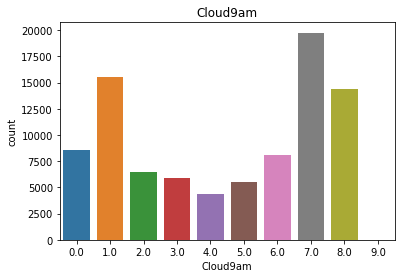

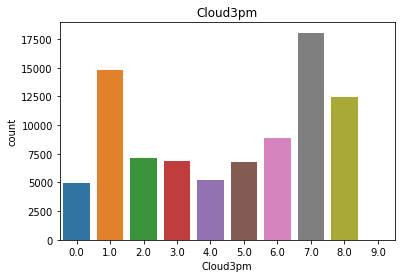

In [6]:
discrete_feat = [feat for feat in numeric_feat if len(df[feat].unique()) < 25]

for feat in discrete_feat:
    sns.countplot(df[feat])
    plt.title(feat)
    plt.show()

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


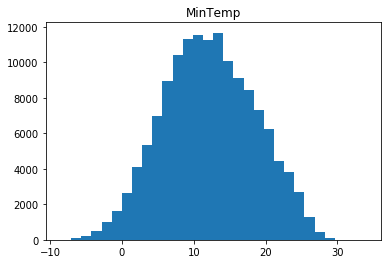

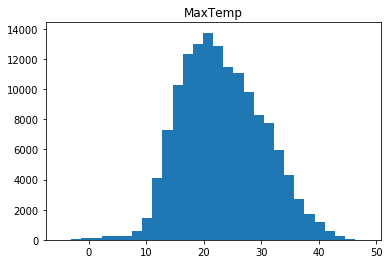

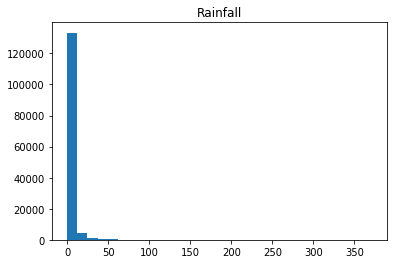

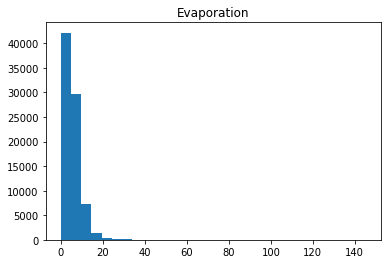

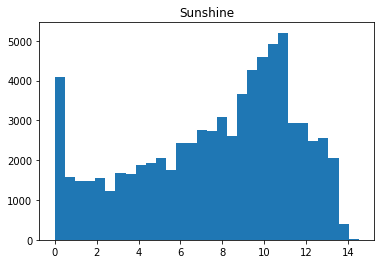

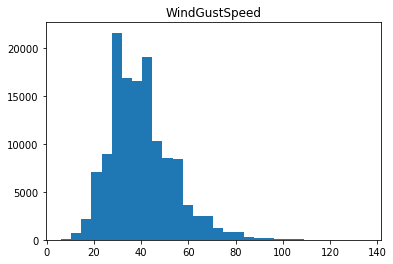

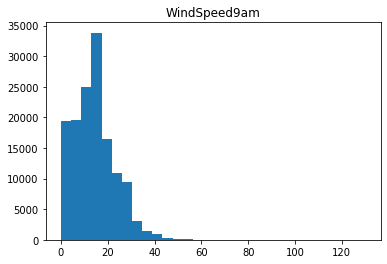

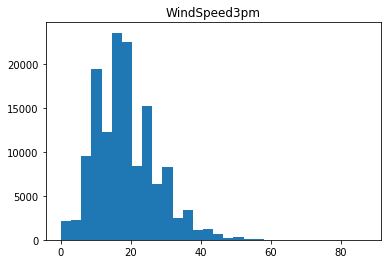

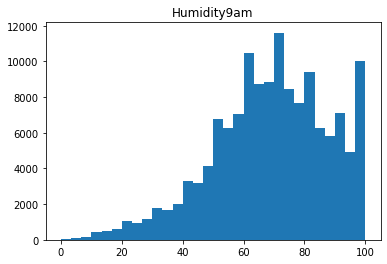

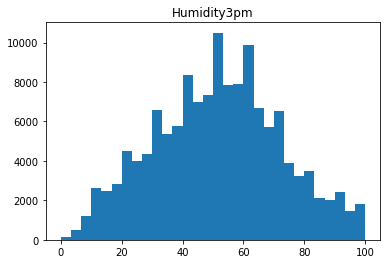

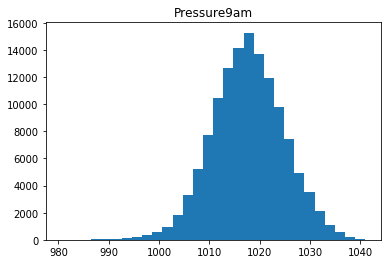

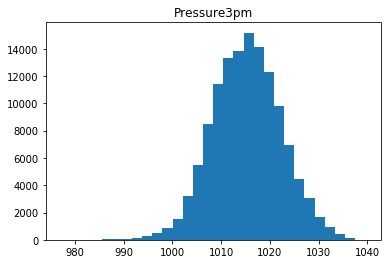

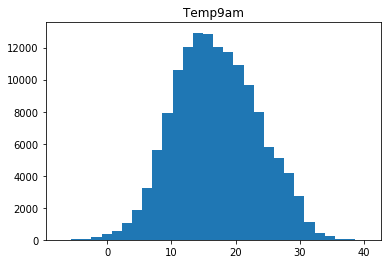

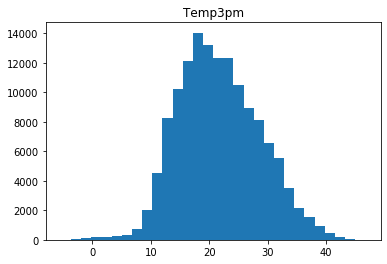

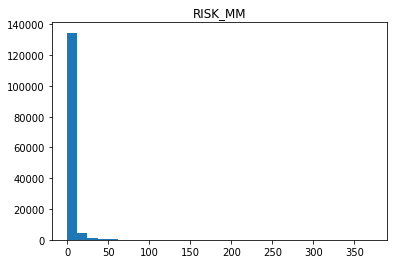

In [7]:
continous_feat = [feat for feat in numeric_feat if feat not in discrete_feat]

for feat in continous_feat:
    plt.hist(df[feat],bins=30)
    plt.title(feat)
    plt.show()

# Outlier

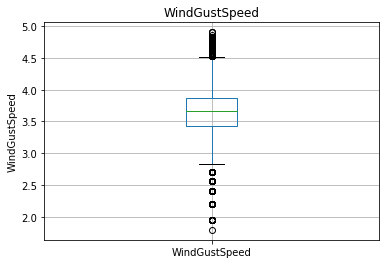

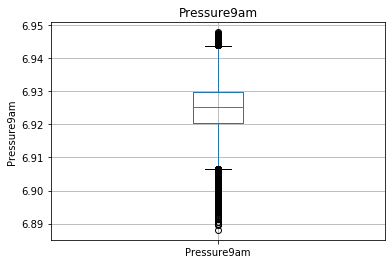

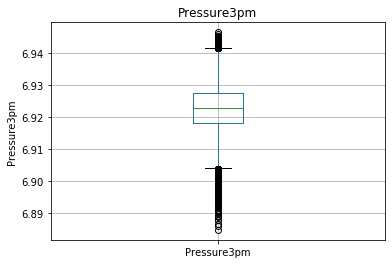

In [8]:
for feat in continous_feat:
    data = df.copy()
    if 0 in df[feat].unique():
        pass
    else:
        data[feat] = np.log(data[feat])
        data.boxplot(column=feat)
        plt.ylabel(feat)
        plt.title(feat)
        plt.show()

# Categorical Feature

In [9]:
categories_feat = [feat for feat in df.columns if df[feat].dtype =='O']

for feat in categories_feat:
    print(f'No. of feature in {feat} is {len(df[feat].unique())} ')

No. of feature in Date is 3436 
No. of feature in Location is 49 
No. of feature in WindGustDir is 17 
No. of feature in WindDir9am is 17 
No. of feature in WindDir3pm is 17 
No. of feature in RainToday is 3 
No. of feature in RainTomorrow is 2 


In [10]:
df[categories_feat].head(3)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No


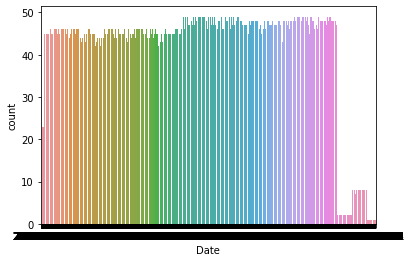

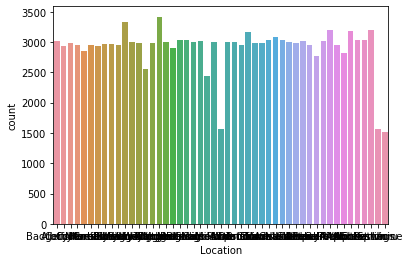

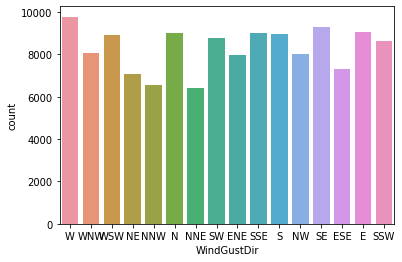

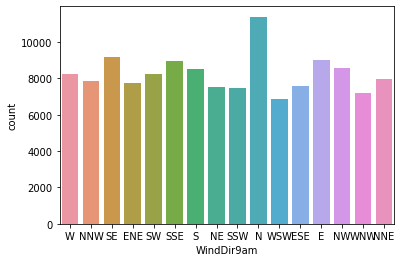

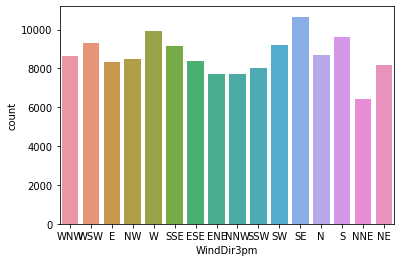

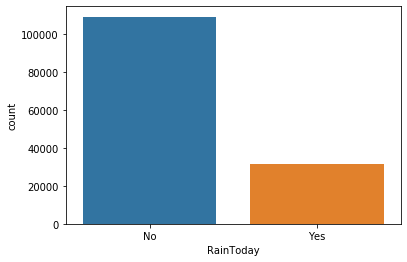

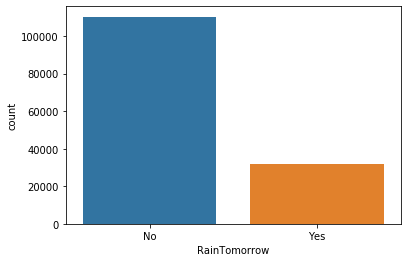

In [11]:
for feat in categories_feat:
        sns.countplot(df[feat])
        plt.show()

# Missing Values

In [12]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [13]:
feature_with_na = [feat for feat in df.columns if df[feat].isnull().sum() >1]

for feat in feature_with_na:
    print(f'{feat} contains nan values {np.round(df[feat].isnull().mean(),4)}%')

MinTemp contains nan values 0.0045%
MaxTemp contains nan values 0.0023%
Rainfall contains nan values 0.0099%
Evaporation contains nan values 0.4279%
Sunshine contains nan values 0.4769%
WindGustDir contains nan values 0.0656%
WindGustSpeed contains nan values 0.0652%
WindDir9am contains nan values 0.0704%
WindDir3pm contains nan values 0.0266%
WindSpeed9am contains nan values 0.0095%
WindSpeed3pm contains nan values 0.0185%
Humidity9am contains nan values 0.0125%
Humidity3pm contains nan values 0.0254%
Pressure9am contains nan values 0.0986%
Pressure3pm contains nan values 0.0983%
Cloud9am contains nan values 0.3774%
Cloud3pm contains nan values 0.4015%
Temp9am contains nan values 0.0064%
Temp3pm contains nan values 0.0192%
RainToday contains nan values 0.0099%


In [14]:
for feat in categories_feat:
    df[feat].fillna('Missing',inplace=True)

In [15]:
df.fillna(df.interpolate(),inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    136254 non-null  float64
 6   Sunshine       136254 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

In [16]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      5939
Sunshine         5939
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
dtype: int64

In [17]:
for feat in ['Evaporation','Sunshine','Cloud3pm']:
    df[feat].fillna(df[feat].median(),inplace=True)

In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

# Encoding

In [19]:
categories_feat = [feat for feat in df.columns if df[feat].dtype =='O']

for feat in categories_feat:
    print(f'No. of feature in {feat} is {len(df[feat].unique())} ')

No. of feature in Date is 3436 
No. of feature in Location is 49 
No. of feature in WindGustDir is 17 
No. of feature in WindDir9am is 17 
No. of feature in WindDir3pm is 17 
No. of feature in RainToday is 3 
No. of feature in RainTomorrow is 2 


In [20]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for feat in categories_feat:
    df[feat] = label.fit_transform(df[feat])

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,5.4,7.927784,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00,5.0,16.9,21.8,1,0.0,0
1,397,2,7.4,25.1,0.0,5.4,7.927784,15,44.0,7,16,4.0,22.0,44.0,25.0,1010.6,1007.8,7.75,5.0,17.2,24.3,1,0.0,0
2,398,2,12.9,25.7,0.0,5.4,7.927784,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,7.50,2.0,21.0,23.2,1,0.0,0
3,399,2,9.2,28.0,0.0,5.4,7.927784,5,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.25,5.0,18.1,26.5,1,1.0,0
4,400,2,17.5,32.3,1.0,5.4,7.927784,14,41.0,1,8,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,1,0.2,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int32  
 1   Location       142193 non-null  int32  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  int32  
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  int32  
 10  WindDir3pm     142193 non-null  int32  
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

scale = StandardScaler()
scale_feat = scale.fit_transform(X)

In [34]:
new_df = pd.DataFrame(scale_feat,columns=X.columns)
new_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,-1.725172,-1.527004,0.189138,-0.046131,-0.209394,-0.185015,0.078231,1.174813,0.301461,1.295696,1.343846,0.675024,0.590073,0.111035,-1.422673,-1.376638,-1.129171,1.256279,0.151776,-0.009716,0.010979,-0.489417,-0.278450
1,-1.724043,-1.527004,-0.748003,0.262990,-0.280121,-0.185015,0.078231,1.376184,0.301461,-0.157549,1.548406,-1.126709,0.364641,-1.301570,-1.277820,-0.963651,-1.028792,1.162514,0.151776,0.036363,0.371366,-0.489417,-0.278450
2,-1.722915,-1.527004,0.111043,0.347296,-0.280121,-0.185015,0.078231,1.577554,0.451211,1.295696,1.548406,0.562416,0.815504,-1.615483,-1.036399,-1.390879,-0.899733,1.068750,-1.025885,0.620025,0.212796,-0.489417,-0.278450
3,-1.721786,-1.527004,-0.466861,0.670469,-0.280121,-0.185015,0.078231,-0.637518,-1.196042,0.465270,-1.724558,-0.338451,-1.100666,-1.249252,-1.712378,0.033215,-0.311800,0.974985,0.151776,0.174599,0.688507,-0.489417,-0.160497
4,-1.720658,-1.527004,0.829518,1.274661,-0.162243,-0.185015,0.078231,1.174813,0.076835,-1.403188,-0.088076,-0.788884,0.139209,0.686541,-0.891547,-0.935169,-1.286909,0.881220,1.329437,0.128520,1.149802,-0.489417,-0.254859


# Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scale_feat, y, test_size=0.33, random_state=42)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_predict = lg.predict(X_test)


print(classification_report(y_test,lg_predict))
print()
print(confusion_matrix(y_test,lg_predict))
print()
print('Accuracy -> ',accuracy_score(y_test,lg_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36466
           1       1.00      1.00      1.00     10458

    accuracy                           1.00     46924
   macro avg       1.00      1.00      1.00     46924
weighted avg       1.00      1.00      1.00     46924


[[36466     0]
 [   46 10412]]

Accuracy ->  0.9990196914159065


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)


print(classification_report(y_test,rf_predict))
print()
print(confusion_matrix(y_test,rf_predict))
print()
print('Accuracy -> ',accuracy_score(y_test,rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36466
           1       1.00      1.00      1.00     10458

    accuracy                           1.00     46924
   macro avg       1.00      1.00      1.00     46924
weighted avg       1.00      1.00      1.00     46924


[[36466     0]
 [    0 10458]]

Accuracy ->  1.0
